### Load Modules

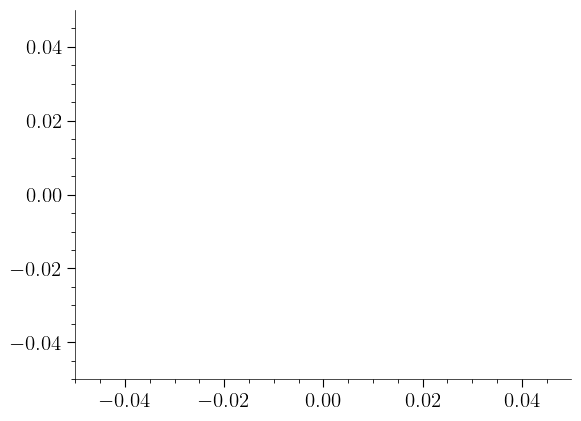

In [1]:
# Restart the kernel
import os
import dill as pickle
current_dir ='../../'
os.chdir(current_dir)

from src.codes.basic import *
from src.codes.utils.plot_utils_v2 import TwoDPlot as plot
from src.codes.utils.rom_utils import *
import time as time

import src.codes.prob_classes.base_class_heat_conduction_AM as bc
# from src.codes.prob_classes.base_class_heat_conduction_AM import ROM_simulation 
import src.codes.reductor.rom_class_AM as rom_class
from src.codes.algorithms.ecsw_t_AM import ecsw_red
import src.codes.algorithms.deim as deim_module

from importlib import reload

In [2]:
reload(bc)
reload(rom_class)

<module 'src.codes.reductor.rom_class_AM' from 'd:\\D\\ONEDRIVE\\OneDrive - Texas A&M University\\Academic\\TAMU_MATERIALS\\POSTDOC\\HYPERREDUCTION\\SUPARNO\\HYPERREDUCTION__TAMIDS\\pyHyperRom\\src\\codes\\reductor\\rom_class_AM.py'>

### Load data

In [3]:
filename_dataC = 'tests/TwoD_heat_conduction_AM/data/DataClass_AM.dill'
with open(filename_dataC, 'rb') as f:
    Data_cls = pickle.load(f)

In [4]:
# load required variables from data
FOS = Data_cls.FOS
d = FOS.data
mask = d.mask
param_list = np.asarray(Data_cls.param_list)
NLS = np.asarray(Data_cls.NL_solutions)
K_mus = Data_cls.K_mus
t = Data_cls.t
q_mus = Data_cls.q_mus

# train_mask, test_mask = Data_cls.train_mask, Data_cls.test_mask 

_,N_snap = np.shape(NLS[0])
print(N_snap)

2501


## ECSW Hyper-reduction

### Train-Test split

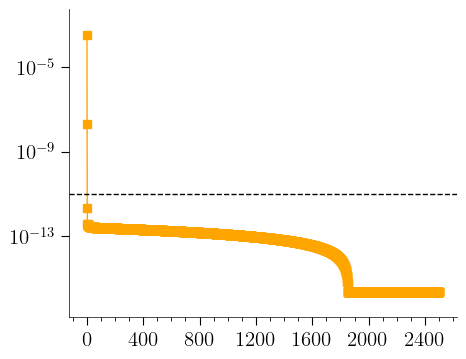

Number of modes selected: 3
norm of rhs: 2341.8608380808255


c:\Users\supar\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
c:\Users\supar\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


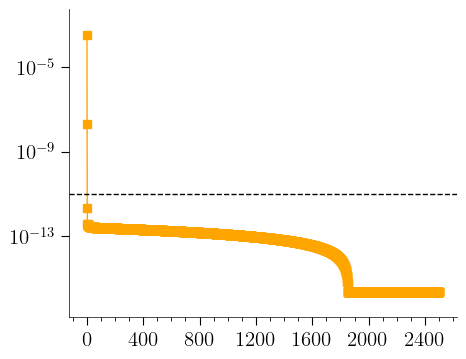

Number of modes selected: 3
norm of rhs: 2341.9143264516015


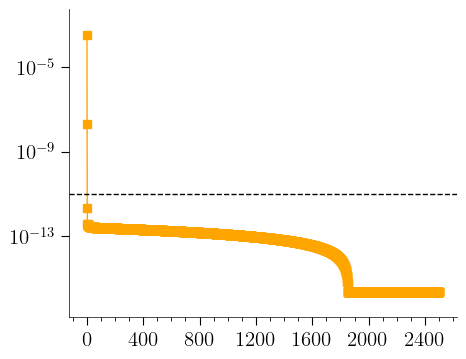

Number of modes selected: 3
norm of rhs: 2341.9180556344313


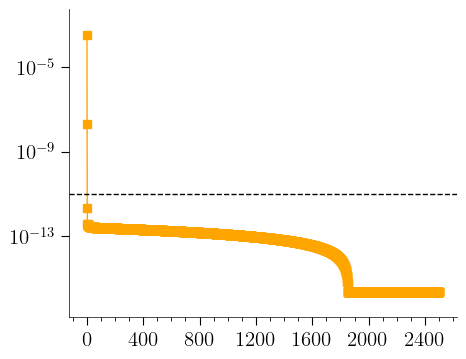

Number of modes selected: 3
norm of rhs: 2341.8943543764644


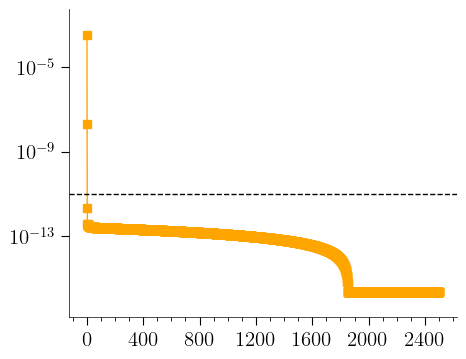

Number of modes selected: 3
norm of rhs: 2341.9333715404096


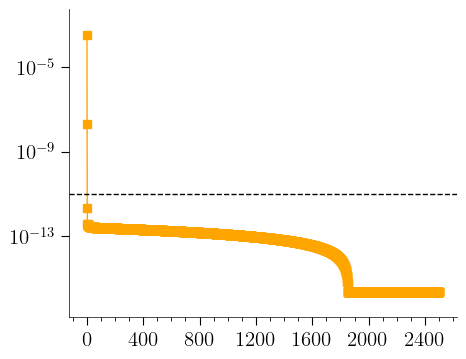

Number of modes selected: 3
norm of rhs: 2337.2411446258543


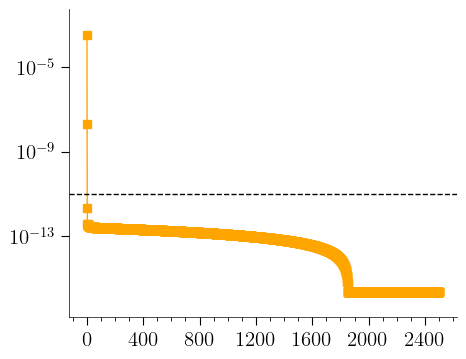

Number of modes selected: 3
norm of rhs: 2310.0955417287114


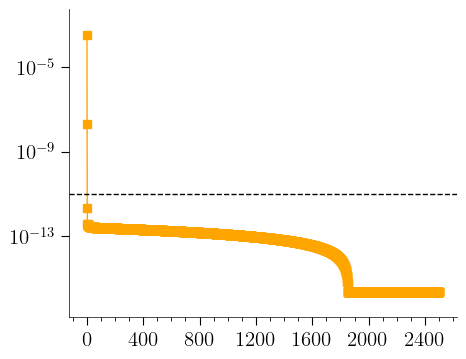

Number of modes selected: 3
norm of rhs: 2341.8960816612903


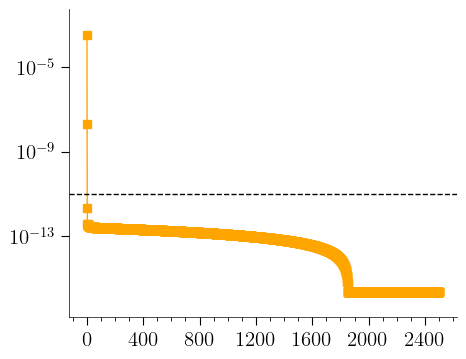

Number of modes selected: 3
norm of rhs: 2341.860830345885


In [25]:
err = []
ROM_speed_up_h = []

for n_sel_add in range(5,50,5):

    train_mask, _ = train_test_split_sobol(N_snap, N_sel=1000)

    ### Data-processing
    NLS_mask = NLS[0][mask]
    NLS_train = NLS_mask[:,train_mask]

    n_sel, U = svd_mode_selector(NLS_mask.T, tolerance=1e-11,modes=True)
    n_sel+=n_sel_add
    V_sel = U[:, :n_sel]

    _,N_snap_train = np.shape(NLS_train)
    tol = None

    xi, residual = ecsw_red(d, V_sel, d.Le, K_mus, q_mus, n_sel, N_snap_train, d.mask, NLS_train, tol=tol)

    ROM_h = bc.ROM_simulation(Data_cls, V_sel, xi, sol_init_guess=298.0) #, N_rom_snap=1)
    ROM_h.run_simulation()
    NLS_rom_h = np.asarray(ROM_h.NL_solutions_rom[0])

    ROM_speed_up_h.append(ROM_h.speed_up)

    err.append(np.linalg.norm(NLS_rom_h-NLS[0])/np.linalg.norm(NLS[0]-298))


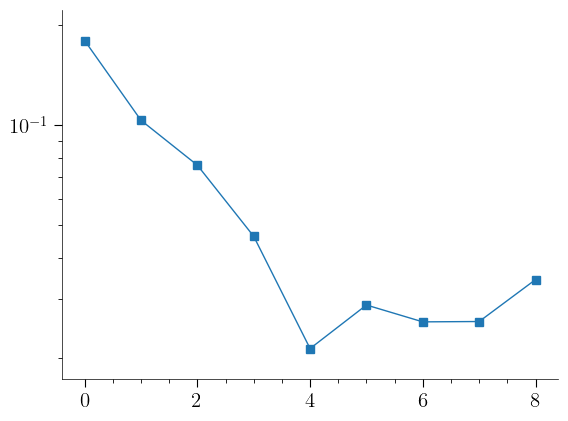

In [26]:
plt.semilogy(err,'s-')

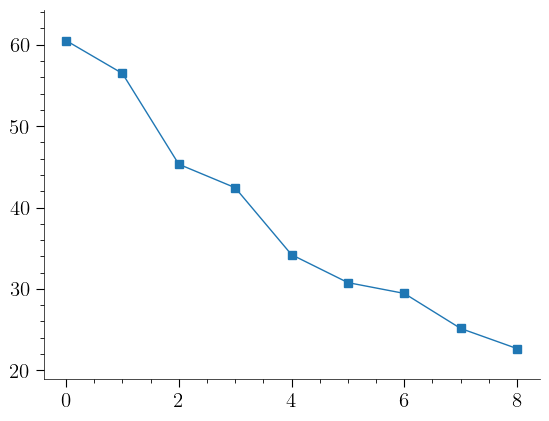

In [28]:
plt.plot(ROM_speed_up_h,'s-')

In [27]:
err

[0.1800660368798123,
 0.10360833617689981,
 0.07590760303731252,
 0.046361315075011164,
 0.021303046490003873,
 0.028805941372736146,
 0.02563149623792006,
 0.02569320527324089,
 0.03435550105333033]

### Plot snapshots

In [6]:
# NLS_train_plot = NLS[0][:,train_mask]

# for i in range(4):
#     Plot = plot(d.xi[0], d.xi[1], NLS_train_plot[:,i])
#     Plot.contour_()
# # plt.show()


#### Step 1: Perform SVD on the snapshots (calculate $\mathbb{V}(=\mathbb{W}$)):

In [7]:
# plt.rcParams['figure.dpi'] = 100
# n_sel, U = svd_mode_selector(NLS_mask.T, tolerance=1e-11,modes=True)
# # n_sel+=20
# V_sel = U[:, :n_sel]

### Step 2: Perform NNLS for ECSW

In [8]:
# _,N_snap_train = np.shape(NLS_train)
# tol = None

In [9]:
# tic_h_setup_b = time.time()

# xi, residual = ecsw_red(d, V_sel, d.Le, K_mus, q_mus, n_sel, N_snap_train, d.mask, NLS_train, tol=tol)

# toc_h_setup_b = time.time()

In [10]:
# plt.rcParams['figure.dpi'] = 200
# plot(0,0,0).element_((d.ncells[0],d.ncells[1]), xi, d.ncells)
# print(f"Fraction of total elements active in the ROM: {len(xi[xi>0])*100/len(xi)}%")
# print(f"{residual=}")

In [11]:
# Data_cls.FOS.data.n_verts


### ROM Simulation

In [12]:
# ROM_h = bc.ROM_simulation(Data_cls, V_sel, xi, sol_init_guess=298.0) #, N_rom_snap=1)
# ROM_h.run_simulation()

In [13]:
# ROM = bc.ROM_simulation(Data_cls, V_sel, sol_init_guess=298.0) #, xi=xi)#, N_rom_snap=1)
# ROM.run_simulation()

### Performance Statistics

In [14]:
# NLS_rom_h = np.asarray(ROM_h.NL_solutions_rom[0])
# ROM_speed_up_h = ROM_h.speed_up
# print(ROM_speed_up_h)

In [15]:
# NLS_rom = np.asarray(ROM.NL_solutions_rom[0])
# ROM_speed_up = ROM.speed_up
# print(ROM_speed_up)

In [16]:
# err= np.linalg.norm(NLS_rom_h-NLS[0])/np.linalg.norm(NLS[0]-298)
# print(err)

In [17]:
# a=25

In [18]:
# plt.rcParams['figure.dpi'] = 50
# Plot = plot(d.xi[0], d.xi[1], NLS_rom_h[:,a])
# Plot.contour_()

In [19]:
# Plot = plot(d.xi[0], d.xi[1], NLS_rom[:,a])
# Plot.contour_()

In [20]:
# Plot = plot(d.xi[0], d.xi[1], NLS[0][:,a])
# Plot.contour_()

In [21]:
# ROM_SOL = ROM.NL_solutions_rom[0]
# fig, ax = plt.subplots(figsize=(5,3.5))

# for i in range(Snap_sel*10):
#     Plot = plot(d.xi[0], ROM_SOL[0][::2,i], ax=ax)
#     Plot.line_()

# plt.show()